In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [224]:
df = pd.read_csv('/dermatology_database.csv')

In [225]:
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [226]:
df.shape

(366, 35)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [228]:
df.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [229]:
df.isnull().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [230]:
df["age"].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [231]:
# Convert '?' values to NaN and str values to float
df['age'] = df['age'].replace('?', np.nan)
df["age"] = df["age"].astype(float)

In [232]:
# Drop rows with NaN values
df = df.dropna()
df.isnull().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

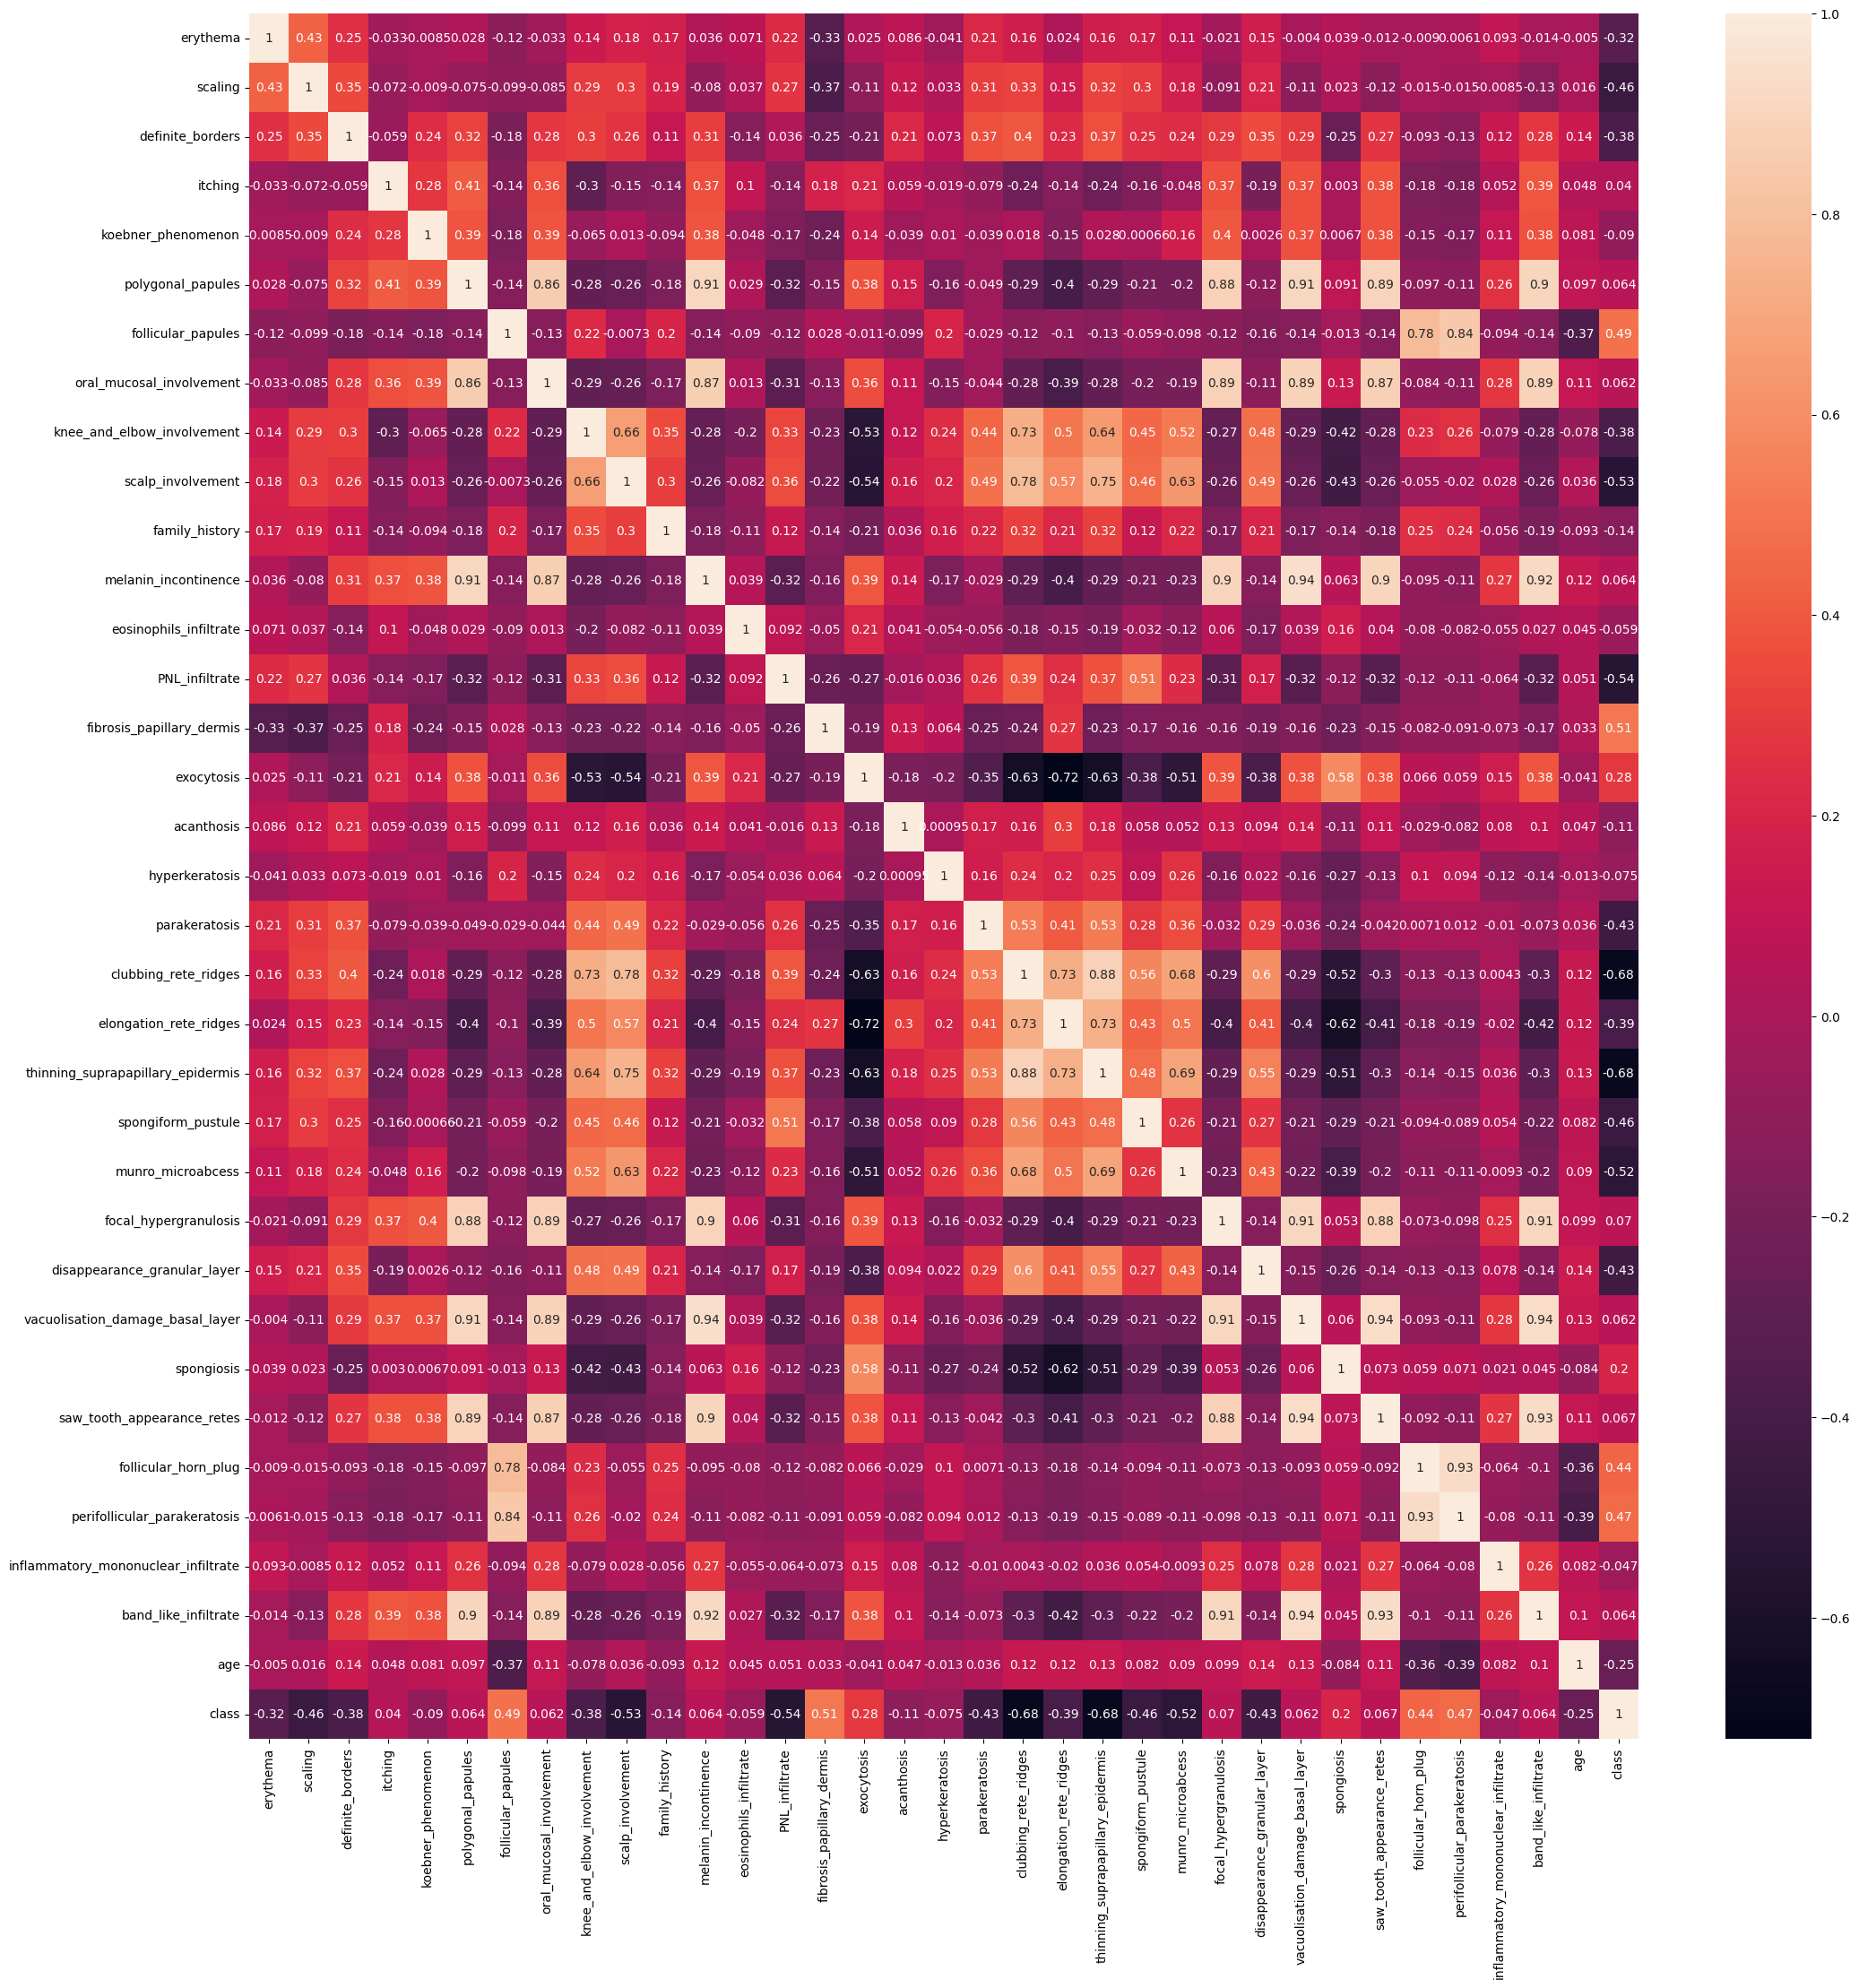

In [233]:
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(df.corr(), annot=True)
plt.show()

In [234]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
y

,class
0,2
1,1
2,3
3,1
4,3
...,...
361,4
362,4
363,3
364,3


In [235]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.666667,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.333333,0.0,0.733333
1,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.106667
2,0.666667,0.333333,0.666667,1.000000,0.333333,1.000000,0.0,1.000000,0.000000,0.000000,...,0.666667,0.000000,0.666667,1.000000,0.666667,0.0,0.0,0.666667,1.0,0.346667
3,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.666667,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.533333
4,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.0,0.666667,0.000000,0.000000,...,0.666667,0.666667,1.000000,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.666667,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.333333
354,1.000000,0.666667,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.480000
355,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.0,0.666667,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.666667,1.0,0.373333
356,0.666667,0.333333,1.000000,0.333333,0.666667,1.000000,0.0,0.666667,0.000000,0.000000,...,1.000000,0.000000,0.666667,0.000000,0.333333,0.0,0.0,0.666667,1.0,0.666667


In [236]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [237]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train.values.ravel())
y_pred = model.predict(X_test)

model.score(X_train, y_train.values.ravel())

0.9825174825174825

In [238]:
accuracy = model.score(X_test, y_test)
print(accuracy)

0.9861111111111112


In [239]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00        18
           4       0.86      1.00      0.92         6
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         5

    accuracy                           0.99        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.99      0.99      0.99        72



In [240]:
print(confusion_matrix(y_test, y_pred))

[[24  0  0  0  0  0]
 [ 0  5  0  1  0  0]
 [ 0  0 18  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0  5]]
